<div class="alert alert-success"><h1>Evaluating a Deep Learning Model in Python</h1></div>

Deep learning has transformed machine learning, driving breakthroughs in computer vision, natural language processing, and speech recognition. Here we explore the crucial step of evaluating a deep learning model in Python, focusing on metrics that reveal different aspects of model performance. We learn to measure predictive accuracy, interpret a confusion matrix, and assess model precision, recall, and the F1-score. These evaluation metrics are essential for understanding a model's strengths and highlighting areas for improvement.

## Learning Objectives
+ Know how to load a previously trained Keras model.
+ Know how to compute and visualize a confusion matrix.
+ Understand the structure and components of a confusion matrix.
+ Know how to calculate key performance metrics such as accuracy, precision, recall, and F1-score.
+ Be able to differentiate between precision and recall, understanding the trade-offs between the two.
+ Understand the importance of the F1-score as a balanced metric between precision and recall.

<div class="alert alert-success"><h2>1. Import the Model and Preprocess the Data</h2></div>

To start, we import the deep learning model we trained in the previous tutorial.

In [ ]:
from tensorflow import keras

model = keras.models.load_model('nnet_model.keras')

Next, we import the test data, which is new unseen data that our model will be evaluated against.

The test data is part of the **MNIST dataset**, a classic dataset in the machine learning community. It consists of 70,000 grayscale images of handwritten digits ranging from 0 to 9. Each image is 28x28 pixels, and the dataset is divided into 60,000 training images and 10,000 testing images.

To get the test images and test labels, we call the `keras.datasets.mnist.load_data()` function:

In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step



Our deep learning model expects the test images as a vector of size 784 (i.e. 28 $\times$ 28). So, let's flatten the images.

In [ ]:
test_images = test_images.reshape(10000, 28 * 28)

The model also expects the image pixel values scaled. Let's do that as well.

In [ ]:
test_images = test_images.astype('float32') / 255

Finally, we also need to one-hot encode the image labels.

In [ ]:
num_classes = 10
test_labels = keras.utils.to_categorical(test_labels, num_classes)

<div class="alert alert-success"><h2>2. Predictive Accuracy</h2></div>

After training, it's crucial to assess how well a model is expected to perform against new, unseen data. There are several metrics that provide us with this information. **Predictive accuracy** is one of them. Predictive accuracy is a straightforward metric and is defined as the ratio of correctly predicted instances to the total number of instances in the data. It is a common metric for classification tasks.

$$
\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}
$$

To get the predictve accuracy of our model, we first get the predicted probabilities for each of the test images.

In [ ]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Then we convert the probabilities to class labels by selecting the class label with the highest predicted probability using the `argmax()` function from the `numpy` package.

In [ ]:
import numpy as np

predicted_classes = np.argmax(predictions, axis = 1)

We do the same thing for the true test labels.

In [ ]:
true_classes = np.argmax(test_labels, axis = 1)

With the predicted and true class values, we can use the `accuracy_score()` function provided by `sklearn.metrics` to calculate the accuracy of the model on the test data.

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(true_classes, predicted_classes)
print(f"The Accuracy of the model on the test images is {accuracy:.4f}.")

The Accuracy of the model on the test images is 0.9801.


A predictive accuracy of 0.9801 means that 98.01% of the predictions made by the model were correct. In other words, out of the 10,000 test images in the data, the model correctly predicted the labels for 9,801 of them, while 199 were misclassified.

Predictive accuracy provides an overall view of how well a model performs on the entire test dataset, giving a general sense of its effectiveness. However, this metric alone may not always reveal important details about the model's weaknesses. To gain deeper insights, it can be useful to examine specific instances where the model made errors.

One way to do this is by identifying and analyzing misclassified examples (i.e. those cases where the model's predictions differ from the true labels). By visualizing a few of these misclassified images, along with their actual and predicted labels, we can better understand patterns in the model's mistakes and identify areas for improvement.

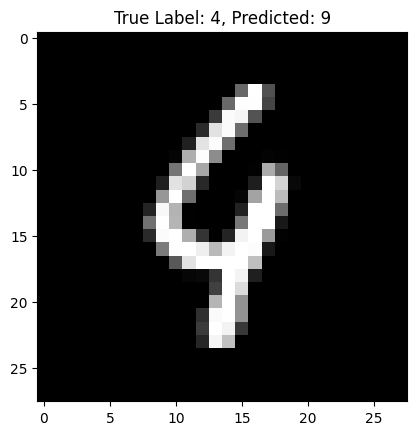

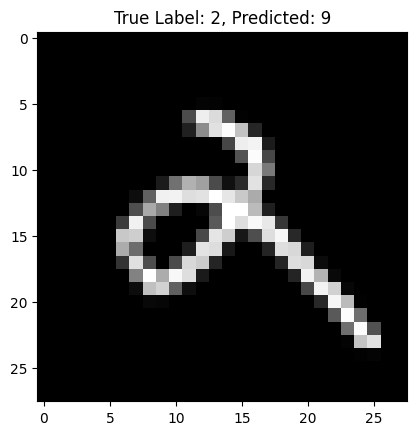

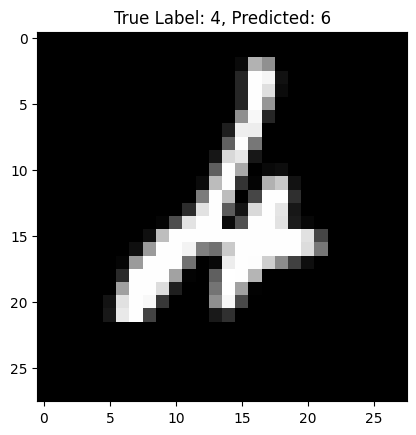

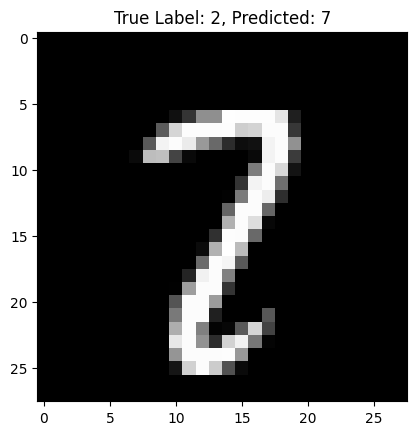

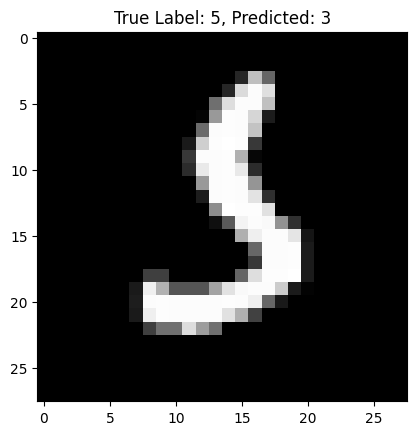

In [ ]:
import matplotlib.pyplot as plt
misclassified_images = np.where(predicted_classes != true_classes)[0]

for i in misclassified_images[:5]:
    plt.imshow(test_images[i].reshape(28, 28), cmap = 'gray')
    plt.title(f'True Label: {true_classes[i]}, Predicted: {predicted_classes[i]}')
    plt.show()

<div class="alert alert-success"><h2>3. Confusion Matrix</h2></div>

A **confusion matrix** provides additional insight into the performance of a model by summarizing how well the model does in classifying each label. This can help us, for instance, identify if there are digits which are commonly misclassified by the model.

To create a confusion matrix for our model, we first use the `confusion_matrix()` function from `sklearn.metrics` to calculate the values of the matrix.

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(true_classes, predicted_classes)

Then we visualize the matrix as a heatmap.

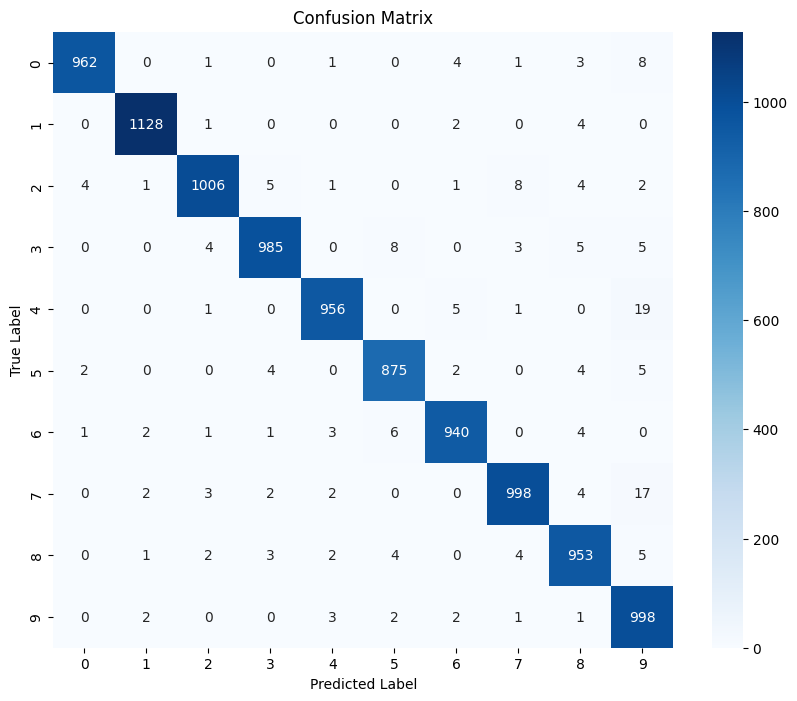

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

The diagonal elements of the confusion matrix represent the number of correct predictions for each label, while the off-diagonal elements represent misclassifications.

Overall, the model performs exceptionally well in correctly classifying most images. However, we do observe that the model occasionally confuses '4' for '9' (19 instances) and '7' for '9' (17 instances). While these are relatively minor errors compared to the 956 correctly classified images of the number '4' and the 998 correctly classified images of the number '7', it may be worth investigating further to identify potential areas for improvement.

<div class="alert alert-success"><h2>4. Precision</h2></div>

**Precision** is a metric that measures the accuracy of the positive predictions made by a model. Specifically, it quantifies how many of the instances that the model predicted as positive are actually true positives.

Precision answers the question: *Of all the instances the model classified as positive, how many were actually correct?*

$$
\text{Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)}+\text{False Positives (FP)}}
$$

+ **True Positives (TP):** Cases where the model correctly predicted the positive class.
+ **False Positives (FP):** Cases where the model predicted the positive class but the actual class was negative (i.e., the model was wrong).

High precision means that when the model predicts a class, it is very likely to be correct. This is especially important in situations where false positives are costly. For example:

+ **Spam detection:** If the model wrongly classifies legitimate emails as spam (false positives), important emails may be missed.
+ **Medical diagnosis:** If a model incorrectly predicts that a healthy person has a disease (false positive), it can lead to unnecessary stress, treatment, or procedures.

In these cases, minimizing false positives is crucial, so high precision is desired.

To calculate the precision score of our model for each class of the test data, we use the `precision_score()` function from `sklearn.metrics`.

In [ ]:
from sklearn.metrics import precision_score

precision_per_class = precision_score(true_classes, predicted_classes, average = None)
for label, precision in enumerate(precision_per_class):
    print(f'Precision for digit {label}: {precision:.4f}')

Precision for digit 0: 0.9928
Precision for digit 1: 0.9930
Precision for digit 2: 0.9872
Precision for digit 3: 0.9850
Precision for digit 4: 0.9876
Precision for digit 5: 0.9777
Precision for digit 6: 0.9833
Precision for digit 7: 0.9823
Precision for digit 8: 0.9705
Precision for digit 9: 0.9424


Let's interpret the results using the first line of the output as an example.

The precision for the digit '0' in this case is 0.9928 or 99.28%. This means that, out of all the instances where the model predicted the digit '0', 99.28% of those predictions were correct. The remaining 0.72% were false positives (i.e. instances where the model incorrectly predicted other digits as '0').

<div class="alert alert-success"><h2>5. Recall</h2></div>

**Recall** (also known as sensitivity or true positive rate) is a metric that measures how well a model can identify actual positive instances. It quantifies how many of the true positive instances were correctly classified by the model.

Recall answers the question: *Of all the actual positive instances, how many did the model correctly identify?*

$$
\text{Recall} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)}+\text{False Negatives (FN)}}
$$

+ **True Positives (TP):** Cases where the model correctly predicted the positive class.
+ **False Negatives (FN):** Cases where the model should have predicted the positive class but did not (i.e., it missed actual positives).

High recall means the model correctly identifies most of the positive cases. This is particularly important in cases where missing a positive instance (false negatives) has serious consequences. Some examples include:

+ **Medical diagnosis:** If a model misses detecting a disease (false negative), the consequences for the patient could be serious.
+ **Fraud detection:** If a fraudulent transaction goes undetected (false negative), the financial damage could be significant.

In these situations, high recall is critical, as it minimizes the chance of missing positive instances (e.g., sick patients, fraudulent transactions).

To calculate the recall score of our model for each class of the test data, we use the `recall_score()` function from `sklearn.metrics`.

In [ ]:
from sklearn.metrics import recall_score

recall_per_class = recall_score(true_classes, predicted_classes, average = None)
for label, recall in enumerate(recall_per_class):
    print(f'Recall for digit {label}: {recall:.4f}')

Recall for digit 0: 0.9816
Recall for digit 1: 0.9938
Recall for digit 2: 0.9748
Recall for digit 3: 0.9752
Recall for digit 4: 0.9735
Recall for digit 5: 0.9809
Recall for digit 6: 0.9812
Recall for digit 7: 0.9708
Recall for digit 8: 0.9784
Recall for digit 9: 0.9891


Let's interpret the results using the first line of the output as an example.

The recall for the digit '0' in this case is 0.9816 or 98.16%. This means that out of all the images that were truly labeled as '0', the model correctly identified 98.16% of them, but it missed 1.84% of the actual '0' images (these were incorrectly classified as some other digit).

<div class="alert alert-success"><h2>6. F1-Score</h2></div>

The **F1-score** is a metric that combines both precision and recall into a single number, providing a balanced measure of a model's performance. It is particularly useful when you want to evaluate a model’s performance in scenarios where there is a trade-off between precision and recall, or when you are dealing with imbalanced datasets.

Mathematically, the F1-score is the harmonic mean of precision and recall and is calculated as follows:

$$
\text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision}+\text{Recall}}
$$

The F1-score is particularly important when:
+ **Working with imbalanced datasets:** These are cases where one class is much more frequent than others (e.g., fraud detection, rare disease diagnosis). In these cases, accuracy can be misleading because the model may perform well by simply predicting the majority class.
+ **Balancing between precision and recall:** When we need to balance the risk of false positives (precision) with the risk of false negatives (recall), the F1-score gives a single metric that reflects that balance.

To calculate the f1-score of a model for each class of the test data, we use the `f1_score()` function from `sklearn.metrics`.

In [ ]:
from sklearn.metrics import f1_score

f1_per_class = f1_score(true_classes, predicted_classes, average = None)
for label, f1 in enumerate(f1_per_class):
  print(f'F1 score for {label}: {f1:.4f}')

F1 score for 0: 0.9872
F1 score for 1: 0.9934
F1 score for 2: 0.9810
F1 score for 3: 0.9801
F1 score for 4: 0.9805
F1 score for 5: 0.9793
F1 score for 6: 0.9822
F1 score for 7: 0.9765
F1 score for 8: 0.9744
F1 score for 9: 0.9652


Let's interpret the results using the first line of the output as an example.

An F1-score of 0.9872 (98.72%) means that the model has a good balance between precision and recall. It is performing well in terms of both minimizing false positives and correctly identifying true positives.

A poor F1-score typically falls significantly lower, such as below 0.5, indicating that the model struggles to maintain a good balance between precision and recall. A low score suggests that a model either produces many false positives (low precision) or fails to identify a significant portion of true positives (low recall).